<a href="https://colab.research.google.com/github/DigitalGeek2000/NEURAL_NETWORK_DA2/blob/main/18BEC0897_DA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the MNIST Dataset

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


3


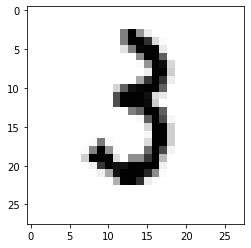

In [2]:
import matplotlib.pyplot as plt
image_index = 1234 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

 Reshaping and Normalizing the Images

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Building the Convolutional Neural Network

In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Compiling and Fitting the Model

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2122 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0861 - accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0564 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0366 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0278 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0244 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0225 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0194 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 30s 16m

Evaluating the Model

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0618 - accuracy: 0.9839


[0.06181492283940315, 0.9839000105857849]

7


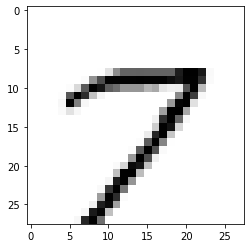

In [8]:
image_index = 6666
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())